# Predefined TFBS

In [1]:
import tfcomb.objects

## Setup a CombObj

In [2]:
o = tfcomb.objects.CombObj()

In [3]:
o.cores = 10

In [4]:
o.print_parameters()

- window: 100
- max_overlap: 0
- stranded: False
- directional: False
- motif_pvalue: 0.0001
- motif_naming: name
- verbosity: 2 (set using '.set_verbosity(<level>)')



## Read TFBS from .bed-file

In [5]:
o.TFBS_from_bed("../data/GM12878.bed")

INFO: Reading sites from '../data/GM12878.bed'...
INFO: Read 1312497 sites (comprising 69 unique TFs)


Now, the CombObj contains the .TFBS variable containing all TFBS to use:

In [6]:
o.TFBS[:10]

[['chr1', 10087, 10088, 'RELB', '793', '.'],
 ['chr1', 10093, 10094, 'NR2C1', '797', '.'],
 ['chr1', 268006, 268007, 'BHLHE40', '598', '.'],
 ['chr1', 268030, 268031, 'ZNF24', '754', '.'],
 ['chr1', 629858, 629859, 'ZSCAN29', '1000', '.'],
 ['chr1', 634014, 634015, 'TBX21', '1000', '.'],
 ['chr1', 634018, 634019, 'ZNF24', '1000', '.'],
 ['chr1', 634019, 634020, 'BACH1', '1000', '.'],
 ['chr1', 634019, 634020, 'IRF3', '1000', '.'],
 ['chr1', 634019, 634020, 'IRF5', '1000', '.']]

## Count co-occurring TFs

In [7]:
o.count_within()

INFO: Counting co-occurring TFs from .TFBS...
INFO: Done finding co-occurrences! Run .market_basket() to estimate significant pairs


## Perform market basket analysis

In [8]:
o.market_basket()

In [9]:
o.table.head()

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,n_baskets,TF1_TF2_support,TF1_support,TF2_support,confidence,lift,cosine,jaccard,pvalue,pvalue_adj
0,CTCF,ZNF143,23874,41402,39402,1312497,0.018190,0.031544,0.030021,0.576639,19.208078,0.591092,0.419357,0.0,0.0
1,ZNF143,CTCF,23874,39402,41402,1312497,0.018190,0.030021,0.031544,0.605908,19.208078,0.591092,0.419357,0.0,0.0
2,USF1,USF2,4376,8092,7690,1312497,0.003334,0.006165,0.005859,0.540781,92.298240,0.554736,0.383658,0.0,0.0
3,USF2,USF1,4376,7690,8092,1312497,0.003334,0.005859,0.006165,0.569051,92.298240,0.554736,0.383658,0.0,0.0
4,MEF2A,MEF2C,8683,22469,11826,1312497,0.006616,0.017119,0.009010,0.386444,42.889057,0.532671,0.339021,0.0,0.0


## Visualize results

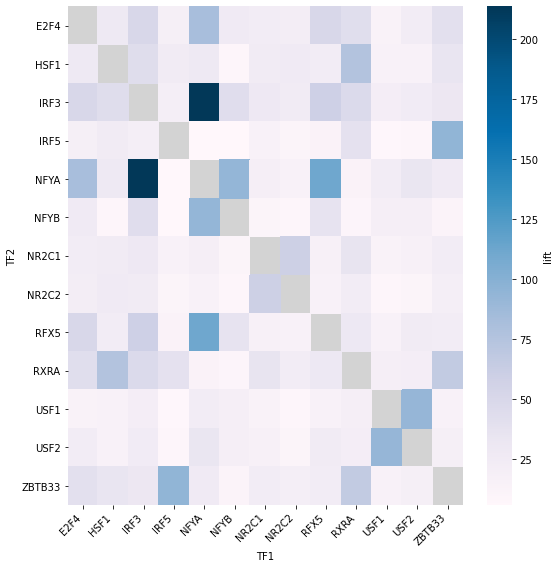

In [10]:
_ = o.plot_heatmap()

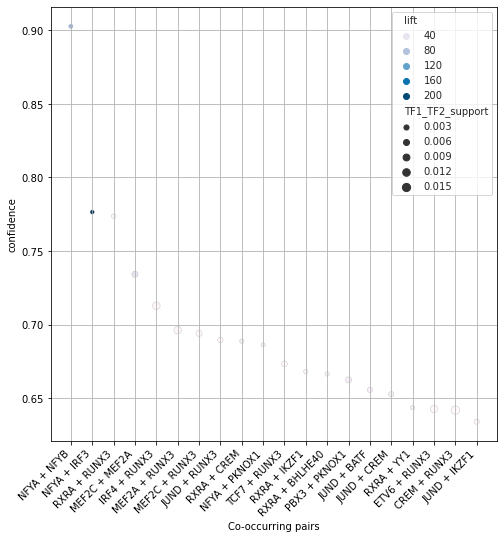

In [11]:
_ = o.plot_bubble()